In [1]:
import re, math
import operator
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import StratifiedShuffleSplit
from random import randint
import ipynb.fs.defs.PeopleInfo as peopleInfo
from nltk.corpus import stopwords
from nltk import TweetTokenizer
from nltk import PorterStemmer
# import ipynb.fs.defs.TweetTextHandler as tweetTextHandler
import ipynb.fs.defs.FilterMethods as filterMethods
import sys, os
sys.path.append('../2_feature')
import ipynb.fs.defs.GetFeatures as getFeatures
global stop_words
stop_words = stopwords.words('english')
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import display, Image
plotly.tools.set_credentials_file(username='Adeline', api_key='Z5eltNtBQXqvI05ZFQtz')
# import plotly.offline as offline
# offline.init_notebook_mode(connected=True)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def replace_by_symbols(txt):
    txt = re.sub(r"https\S+", '', txt)
    txt = re.sub(r"http\S+", '', txt)
    txt = re.sub(r"pic.twitter.com\S+", '', txt)
    txt = re.sub(r"twitter.com/\S+", '', txt)
    txt = re.sub(r"\S+/\S+", '', txt)
    txt = re.sub(r"@\S+", '', txt)
    txt = re.sub(r"#\S+", '', txt)
    txt = re.sub(r"idk", 'i do not know', txt)   # idk: i don't know
    txt = re.sub(r"tho", 'though', txt)   # tho
    txt = re.sub(r"i\'m", 'i am', txt)
    txt = re.sub(r"you\'re", 'you are', txt)
    txt = re.sub(r"he\'s", 'he is', txt)
    txt = re.sub(r"she\'s", 'she is', txt)
    txt = re.sub(r"it\'s", 'it is', txt)
    txt = re.sub(r"we\'re", 'we are', txt)
    txt = re.sub(r"they\'re", 'they are', txt)
    txt = re.sub(r"isn\'t", 'is not', txt)
    txt = re.sub(r"don\'t", 'do not', txt)
    txt = re.sub(r"doesn\'t", 'does not', txt)
    txt = re.sub(r"didn\'t", 'did not', txt)
    txt = re.sub(r"wasn\'t", 'was not', txt)
    txt = re.sub(r"weren\'t", 'were not', txt)
    txt = re.sub(r"haven\'t", 'have not', txt)
    txt = re.sub(r"can\'t", 'can not', txt)
    txt = re.sub(r"couldn\'t", 'could not', txt)
    txt = re.sub(r"wouldn\'t", 'would not', txt)
    txt = re.sub(r"shouldn\'t", 'should not', txt)
    txt = re.sub(r"&amp", '', txt)
    return txt

In [125]:
regStrs = []
with open('groupFeatureOriginPatternList') as read_file:
    for regStr in read_file.readlines():
        regStrs.append(regStr.strip())

In [138]:
text = 'his twitter but in what world have little boys lost a role model?'

In [147]:
hit = 0
for regStr in regStrs:
    if re.search(re.compile(regStr), text.lower()) != None:
        hit += 1

(^his\s\w+\s\w+\sin$)|(^his\s\w+\s\w+\sin\s)|(\shis\s\w+\s\w+\sin$)|(\shis\s\w+\s\w+\sin\s)


In [136]:
re.search(re.compile('(^s\st)|(^s\st\s)|(\ss\st$)|(\ss\st\s)'), ' s t')

<_sre.SRE_Match object; span=(0, 4), match=' s t'>

In [148]:
hit

1

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


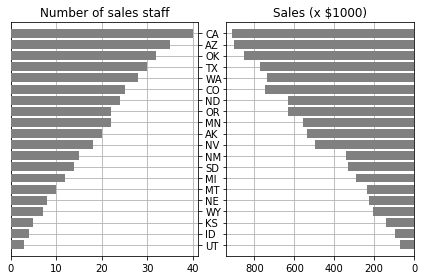

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Data
states = ["AK", "TX", "CA", "MT", "NM", "AZ", "NV", "CO", "OR", "WY", "MI",
          "MN", "UT", "ID", "KS", "NE", "SD", "WA", "ND", "OK"]
staff = np.array([20, 30, 40, 10, 15, 35, 18, 25, 22, 7, 12, 22, 3, 4, 5, 8,
                  14, 28, 24, 32])
sales = staff * (20 + 10 * np.random.random(staff.size))

# Sort by number of sales staff
idx = staff.argsort()
states, staff, sales = [np.take(x, idx) for x in [states, staff, sales]]

y = np.arange(sales.size)
print(y)
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, staff, align='center', color='gray', zorder=10)
axes[0].set(title='Number of sales staff')
axes[1].barh(y, sales, align='center', color='gray', zorder=10)
axes[1].set(title='Sales (x $1000)')

axes[1].invert_xaxis()
axes[0].set(yticks=y, yticklabels=states)
# axes[0].yaxis.tick_right()
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.15)
plt.show()

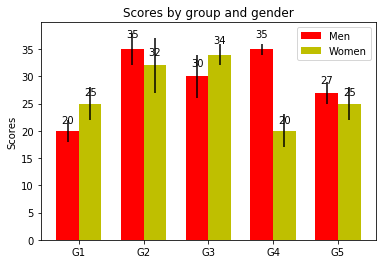

In [37]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [38]:
from collections import Counter

In [41]:
abc = Counter('abcdddddd')

In [43]:
aaa = Counter('aa')

In [49]:
abc+aaa+eee

Counter({'a': 3, 'b': 1, 'c': 1, 'd': 6, 'e': 1})

In [46]:
eee = Counter('e')